In [ ]:
#import libraries
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np



In [8]:
# Load pre-trained ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [9]:
# Create a global average pooling layer
x = GlobalAveragePooling2D()(base_model.output)

# Add a fully connected layer
x = Dense(1024, activation='relu')(x)

# Add a classification layer with 2 labels
predictions = Dense(2, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()
model.compile(optimizer=Adam(learning_rate=0.01),
               loss='categorical_crossentropy',
                 metrics=['accuracy'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,687,938 (97.99 MB)

 Trainable params: 2,100,226 (8.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = data_generator.flow_from_directory(
        'C:/Users/ahmed/Downloads/project/train',
        target_size=(image_size, image_size),
        batch_size=1,
        class_mode='categorical')
validation_generator = data_generator.flow_from_directory(
        'C:/Users/ahmed/Downloads/project/test',
        target_size=(image_size, image_size),
        batch_size=1,
        class_mode='categorical')



Found 53 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [11]:
history = model.fit(train_generator,validation_data = validation_generator,epochs=5)

Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 115ms/step - accuracy: 0.7729 - loss: 22.3426 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


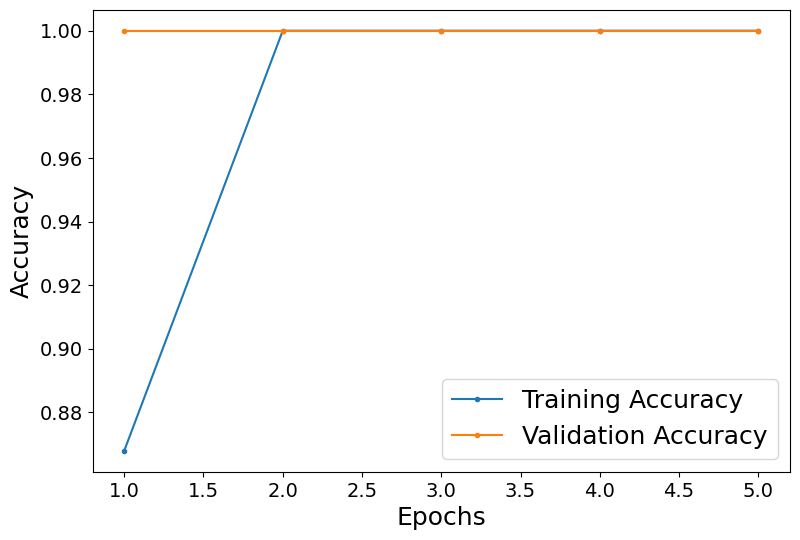

In [12]:
# Extract the loss values from the history
import matplotlib.pylab as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

params = {
   'axes.labelsize': 18,
   'font.size': 18,
   'legend.fontsize': 18,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [9, 6]
   }
plt.rcParams.update(params)


# Create a plot to visualize the training and validation loss
#plt.figure(figsize=(5, 3))
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', marker='.')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', marker='.')
#plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(False)

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input

labels = {0: 'Apple', 1: 'Banana'}

def capture_and_predict():
   
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not access the camera.")
        return

    print("Press 'c' to capture an image and predict, or 'q' to quit.")
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture image.")
            break

        # Display the frame
        cv2.imshow("Camera", frame)

        # Wait for key press
        key = cv2.waitKey(1)
        if key & 0xFF == ord('c'):
            # Process the captured image
            prediction = predict_image(frame)
            print(f"Predicted Type: {prediction}")
        elif key & 0xFF == ord('q'):
            break

    # Release the webcam and close windows
    cap.release()
    cv2.destroyAllWindows()

def predict_image(image):
    # Resize the image to match ResNet50 input size
    resized_image = cv2.resize(image, (224, 224))
    # Convert the image to a NumPy array and expand dimensions
    img_array = np.expand_dims(resized_image, axis=0)
    # Preprocess the image for ResNet50
    preprocessed_image = preprocess_input(img_array)

    # Predict using the model
    predictions = model.predict(preprocessed_image)
    predicted_class = np.argmax(predictions, axis=1)[0]

    # Map the prediction to the label
    return (predictions)

if __name__ == "__main__":
    capture_and_predict()

Press 'c' to capture an image and predict, or 'q' to quit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Type: [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted Type: [[0. 1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted Type: [[0. 1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted Type: [[1.2740757e-07 9.9999988e-01]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted Type: [[4.8468684e-19 1.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted Type: [[5.7056676e-28 1.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted Type: [[3.0081927e-34 1.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted Type: [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted Type: [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted Type: [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Predicted Type: [[1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted Type: [[1. 0.]]
